# **Proposal: Trading Card Game Analysis By Sergio Carrillo**

## Question: Which trading card game(s) offers the best oppurtunity for Cooledtured in terms of pricing, sale potential, and content creation?

## Note: Holiday season is around the corner


####We aim to compare trading card game (TCG) popularity through readily avaliable data (i.e. Google Trends, etc.) and use exploratory data analysis (EDA). Once popularity is determined, price analysis will be conducted to determine which upcoming card game releases are worth buying based on popularity and cost ahead of the upcoming 2024 Christmas/Holiday season. By examining both search trends and card prices, the goal is to provide insights into consumer behavior, market shifts, and potential revenue drivers for the anime ecommerce company.

###Objectives
**Trend Analysis of Card Game Popularities:**

**Potential Data Sources:** Google Trends, TCGPlayer, ICV2 reports.

Comparison: Analyze search trends for MTG, Pokémon, and Yu-Gi-Oh! over the past 12 months, with a focus on significant events such as new set releases, competitive tournaments, and seasonal trends (e.g., holiday spikes).



Site showing the growth of holiday sales 3.8% in 2023 and roughly 70% of revenue from toy and game markets comes from the 4th quater aka holiday season
https://nrf.com/media-center/press-releases/nrf-says-census-data-shows-2023-holiday-sales-grew-38-record-9644

###Deliverables

Trend Report: A detailed report outlining the popularity comparison between MTG, Pokémon, and Yu-Gi-Oh!, including visualizations of search trends and notable events.
Price Analysis: A comparative analysis of card prices from recent releases, highlighting key findings, spikes, and potential causes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Re-read the CSV and skip the first row to get proper headers
cards = pd.read_csv('TCG_pastyear_google.csv', skiprows=1)


In [ ]:
cards.columns

Index(['Week', 'Magic: The Gathering: (United States)',
       'Yugioh: (United States)', 'Pokémon: (United States)',
       'Disney Lorcana: (United States)', 'Flesh & Blood: (United States)'],
      dtype='object')

In [ ]:
# Rename columns to remove " (United States)" from the game names
cards.columns = cards.columns.str.replace(' \(United States\)', '', regex=True)

# Print the updated columns to verify the changes
print(cards.columns)


Index(['Week', 'Magic: The Gathering:', 'Yugioh:', 'Pokémon:',
       'Disney Lorcana:', 'Flesh & Blood:'],
      dtype='object')


In [ ]:
cards.describe()

,Magic: The Gathering:,Yugioh:,Pokémon:,Disney Lorcana:
count,53.000000,53.000000,53.000000,53.000000
mean,24.150943,6.301887,72.018868,1.452830
std,2.904878,0.932014,15.249830,0.502533
min,19.000000,5.000000,14.000000,1.000000
25%,22.000000,6.000000,66.000000,1.000000
50%,24.000000,6.000000,74.000000,1.000000
75%,27.000000,6.000000,81.000000,2.000000
max,30.000000,10.000000,100.000000,2.000000


In [ ]:
cards.head(5)

,Week,Magic: The Gathering:,Yugioh:,Pokémon:,Disney Lorcana:,Flesh & Blood:
0,2023-10-08,19,6,80,1,<1
1,2023-10-15,21,6,79,1,<1
2,2023-10-22,21,6,74,1,<1
3,2023-10-29,20,5,67,1,<1
4,2023-11-05,20,6,69,1,<1


In [ ]:
cards.replace('<1', 0.5, inplace=True)

<ipython-input-36-559b42f99b5a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cards.replace('<1', 0.5, inplace=True)


In [ ]:
cards.head()

,Week,Magic: The Gathering:,Yugioh:,Pokémon:,Disney Lorcana:,Flesh & Blood:
0,2023-10-08,19,6,80,1,0.5
1,2023-10-15,21,6,79,1,0.5
2,2023-10-22,21,6,74,1,0.5
3,2023-10-29,20,5,67,1,0.5
4,2023-11-05,20,6,69,1,0.5


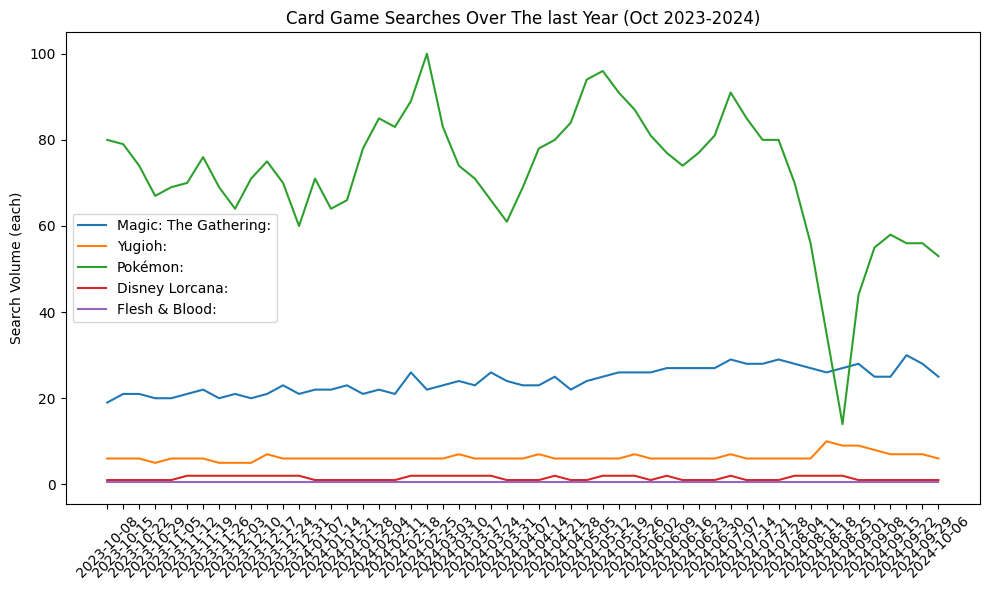

In [ ]:
plt.figure(figsize=(10, 6))
for game in ['Magic: The Gathering:', 'Yugioh:', 'Pokémon:', 'Disney Lorcana:', 'Flesh & Blood:']:
    plt.plot(cards['Week'], cards[game], label=game)

plt.title('Card Game Searches Over The last Year (Oct 2023-2024)')
plt.ylabel('Search Volume (each)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

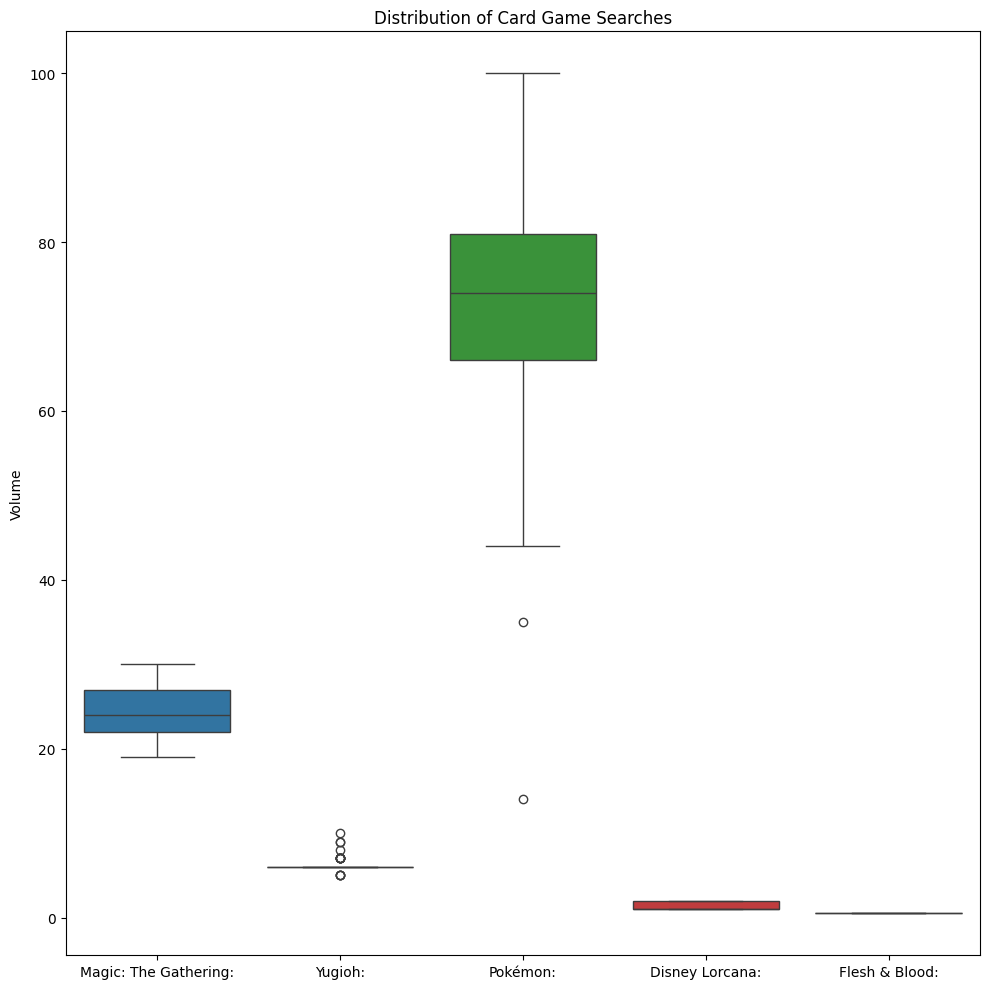

In [ ]:
# 2. Boxplots: Distribution of searches for each game
plt.figure(figsize=(10, 10))
sns.boxplot(data=cards[['Magic: The Gathering:', 'Yugioh:', 'Pokémon:', 'Disney Lorcana:', 'Flesh & Blood:']])
plt.title('Distribution of Card Game Searches')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

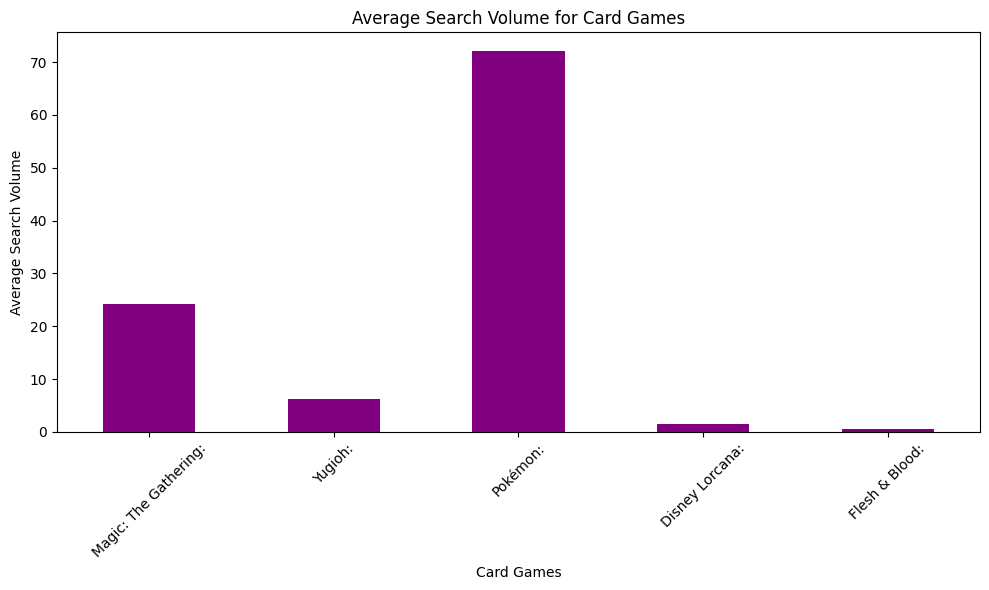

In [ ]:
avg_searches = cards[['Magic: The Gathering:', 'Yugioh:', 'Pokémon:', 'Disney Lorcana:', 'Flesh & Blood:']].mean()
plt.figure(figsize=(10, 6))
avg_searches.plot(kind='bar', color='purple')
plt.title('Average Search Volume for Card Games')
plt.xlabel('Card Games')
plt.ylabel('Average Search Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                       Week_ordinal  Magic: The Gathering:   Yugioh:  \
Week_ordinal               1.000000               0.877062  0.525076   
Magic: The Gathering:      0.877062               1.000000  0.409030   
Yugioh:                    0.525076               0.409030  1.000000   
Pokémon:                  -0.295513              -0.138114 -0.574095   
Disney Lorcana:           -0.126374              -0.008202  0.030988   
Flesh & Blood:                  NaN                    NaN       NaN   

                       Pokémon:  Disney Lorcana:  Flesh & Blood:  
Week_ordinal          -0.295513        -0.126374             NaN  
Magic: The Gathering: -0.138114        -0.008202             NaN  
Yugioh:               -0.574095         0.030988             NaN  
Pokémon:               1.000000         0.016429             NaN  
Disney Lorcana:        0.016429         1.000000             NaN  
Flesh & Blood:              NaN              NaN             NaN  


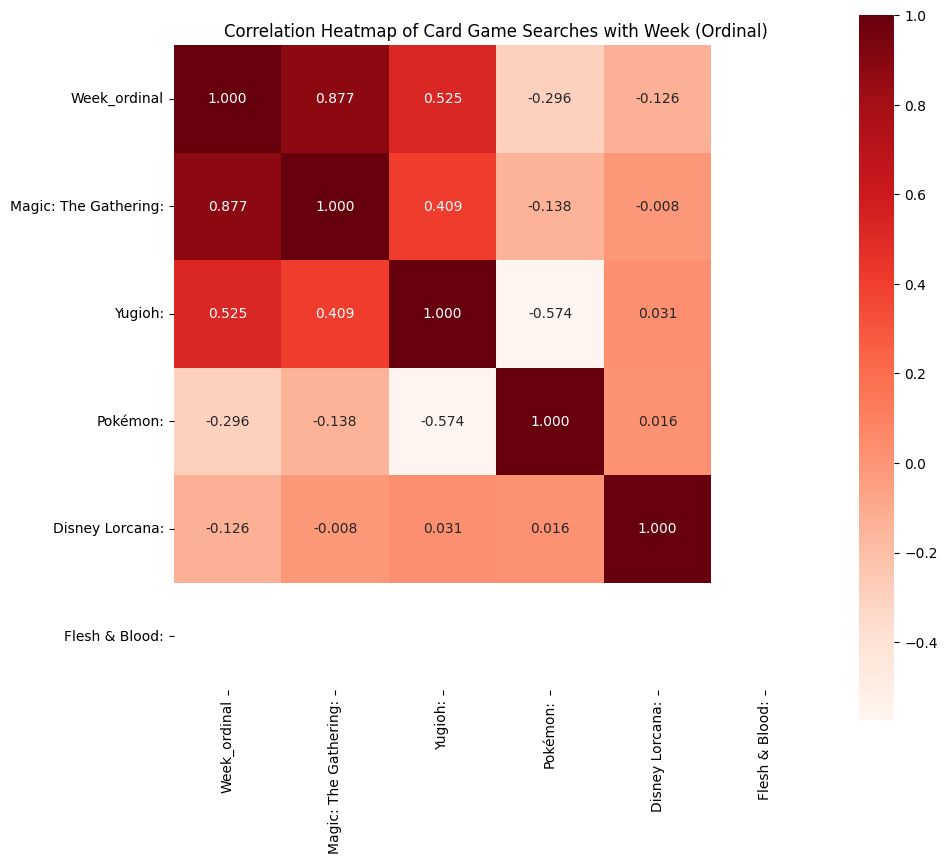

In [ ]:
cards['Week'] = pd.to_datetime(cards['Week'])
cards['Week_ordinal'] = cards['Week'].map(lambda x: x.toordinal())

# 5. Correlation Heatmap including 'Week_ordinal' instead of 'Week'
plt.figure(figsize=(10, 10))
correlation_matrix = cards[['Week_ordinal', 'Magic: The Gathering:', 'Yugioh:', 'Pokémon:', 'Disney Lorcana:', 'Flesh & Blood:']].corr()
print(correlation_matrix)
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.3f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Card Game Searches with Week (Ordinal)')
plt.tight_layout()
plt.show()

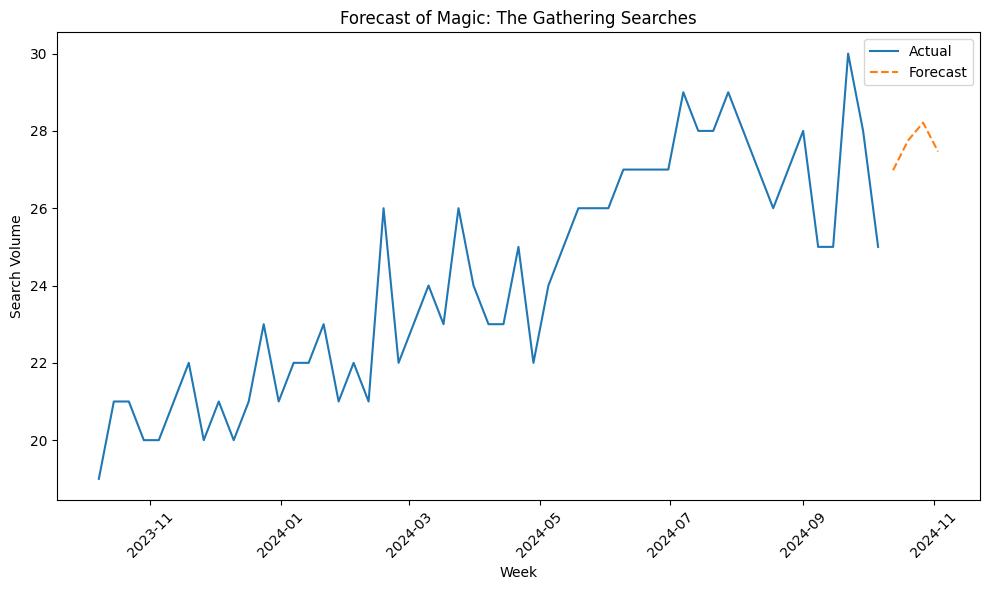

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit a model
model = ExponentialSmoothing(cards['Magic: The Gathering:'], trend='add', seasonal='add', seasonal_periods=4).fit()

# Forecast the next 4 weeks
forecast = model.forecast(4)
plt.figure(figsize=(10, 6))
plt.plot(cards['Week'], cards['Magic: The Gathering:'], label='Actual')
plt.plot(pd.date_range(start=cards['Week'].max() + pd.Timedelta(weeks=1), periods=4, freq='W'), forecast, label='Forecast', linestyle='--')
plt.title('Forecast of Magic: The Gathering Searches')
plt.xlabel('Week')
plt.ylabel('Search Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


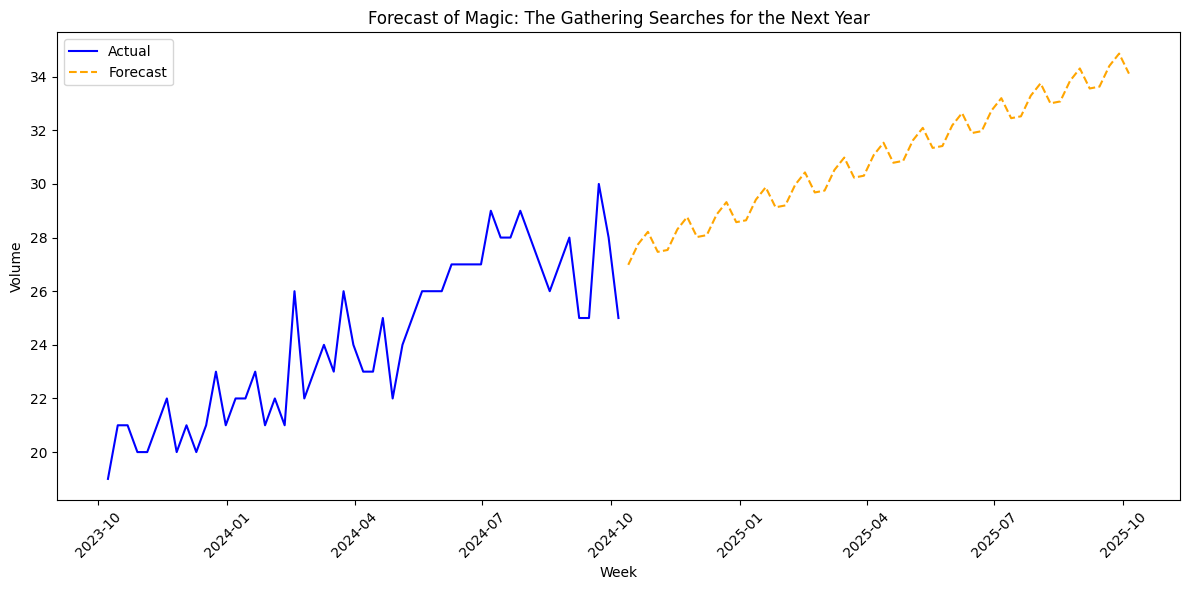

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(cards['Magic: The Gathering:'], trend='add', seasonal='add', seasonal_periods=4).fit()

# Forecast the next 52 weeks
forecast_periods = 52  # Forecasting for 52 weeks (1 year)
forecast = model.forecast(forecast_periods)

# Create a date range for the forecast
forecast_index = pd.date_range(start=cards['Week'].max() + pd.Timedelta(weeks=1), periods=forecast_periods, freq='W')

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(cards['Week'], cards['Magic: The Gathering:'], label='Actual', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='dashed', color='orange')
plt.title('Forecast of Magic: The Gathering Searches for the Next Year')
plt.xlabel('Week')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


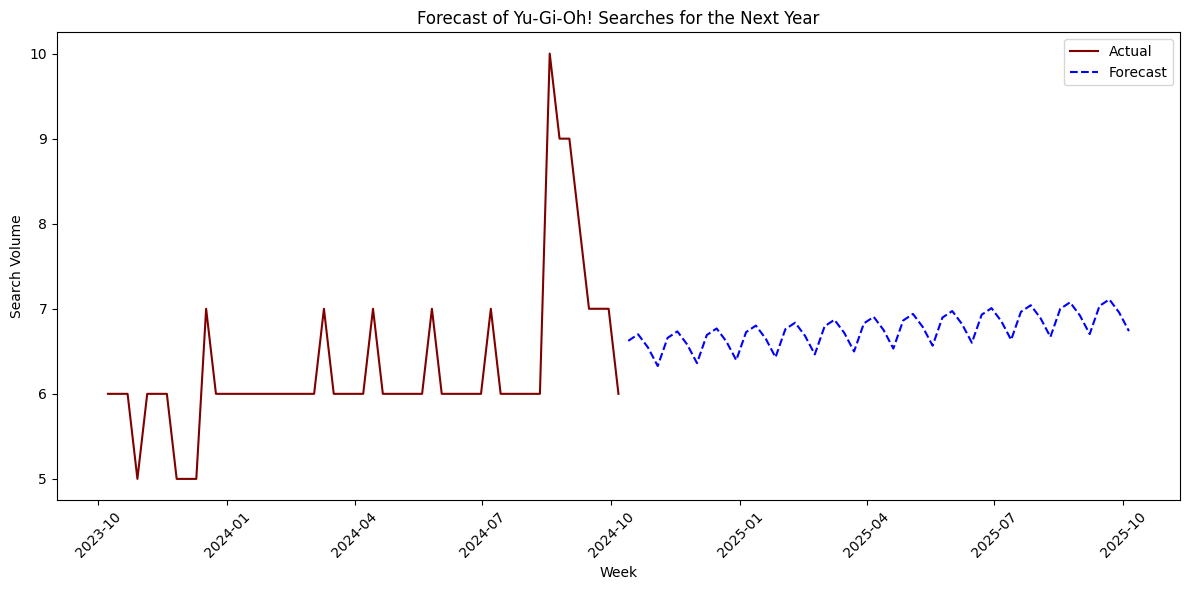

In [ ]:

# Fit the Exponential Smoothing model for Yu-Gi-Oh!
model_yugioh = ExponentialSmoothing(cards['Yugioh:'], trend='add', seasonal='add', seasonal_periods=4).fit()

# Forecast the next 52 weeks (1 year)
forecast_periods = 52  # Forecasting for 52 weeks
forecast_yugioh = model_yugioh.forecast(forecast_periods)

# Create a date range for the forecast
forecast_index_yugioh = pd.date_range(start=cards['Week'].max() + pd.Timedelta(weeks=1), periods=forecast_periods, freq='W')

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(cards['Week'], cards['Yugioh:'], label='Actual', color='maroon')
plt.plot(forecast_index_yugioh, forecast_yugioh, label='Forecast', linestyle='--', color='blue')
plt.title('Forecast of Yu-Gi-Oh! Searches for the Next Year')
plt.xlabel('Week')
plt.ylabel('Search Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()